In [3]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('airlines.csv')
data
airport_data = data[['Airport.Code', 'Statistics.Flights.Total','Statistics.Flights.Delayed','Statistics.Flights.Cancelled']]
airport_data = airport_data.groupby('Airport.Code').sum()
airport_data


,Statistics.Flights.Total,Statistics.Flights.Delayed,Statistics.Flights.Cancelled
Airport.Code,,,
ATL,5092841,1052410,86176
BOS,1491908,324595,38652
BWI,1300066,236712,17124
CLT,1542302,277619,23753
DCA,1051919,196691,29708
DEN,2773104,506238,35926
DFW,3636019,657588,80802
DTW,1725655,309430,29888
EWR,1670555,486592,54880


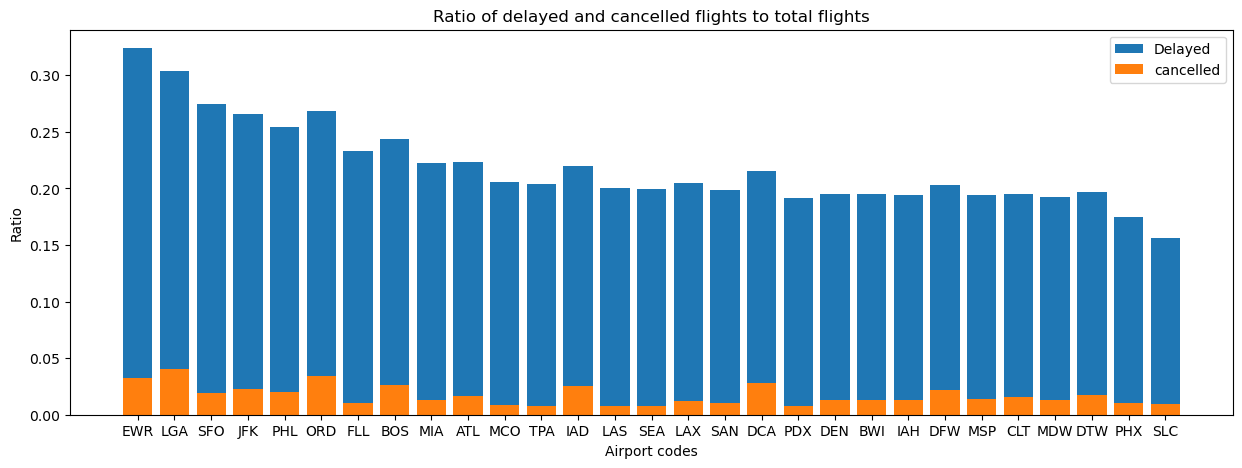

In [4]:
delayed = airport_data['Statistics.Flights.Delayed']
cancelled = airport_data['Statistics.Flights.Cancelled']
total = airport_data['Statistics.Flights.Total']
airport_data['Ratio Delayed.Total']= delayed/total
airport_data['Ratio Cancelled.Total']= cancelled/total
airport_data
# Sort DataFrame rows
airport_data = airport_data.sort_values(by='Ratio Delayed.Total', ascending=False)

# Assign variables
airport_code = airport_data.index
delayed = airport_data['Ratio Delayed.Total']
cancelled = airport_data['Ratio Cancelled.Total']

# Create a figure and set its size to 15x5 in.
fig, ax = plt.subplots(figsize=(15,5))

# Plot bar charts
ax.bar(airport_code, delayed[airport_code], bottom=cancelled[airport_code], label='Delayed')
ax.bar(airport_code, cancelled[airport_code], label='cancelled')

# Add axes labels and title
ax.set_xlabel('Airport codes')
ax.set_ylabel('Ratio')
ax.set_title('Ratio of delayed and cancelled flights to total flights')
# Show legend
ax.legend()

# Show plot
plt.show()